In [3]:
import sys
sys.path.append('..')
import torch
from os.path import isfile
from train_clip import train_clip
from train_prior import train_prior
from train_decoder import train_decoder
from data.data_utils import tokenizer
from data.FMNISTConfig import FMNISTConfig
from model.decoder import sample_plot_image

In [ ]:
config = FMNISTConfig()
config.clip.model_location = "../" + config.clip.model_location 
config.prior.model_location = "../" + config.prior.model_location 
config.decoder.model_location = "../" + config.decoder.model_location 

if not isfile(config.clip.model_location):
    print("CLIP model has not been trained. Training CLIP...")
    print("Using device: ", config.device, f"({torch.cuda.get_device_name(config.device)})" if torch.cuda.is_available() else "")
    train_clip(config)

if not isfile(config.prior.model_location):
    print("Prior model has not been trained. Training Prior...")
    print("Using device: ", config.device, f"({torch.cuda.get_device_name(config.device)})" if torch.cuda.is_available() else "")
    train_prior(config)

if not isfile(config.decoder.model_location):
    print("Decoder model has not been trained. Training Decoder...")
    print("Using device: ", config.device, f"({torch.cuda.get_device_name(config.device)})" if torch.cuda.is_available() else "")
    train_decoder(config)

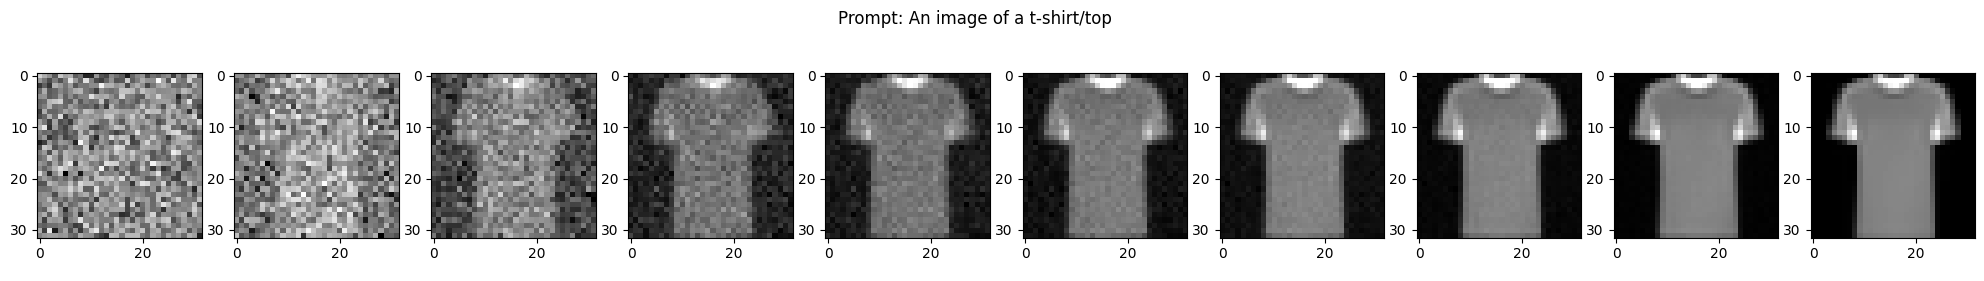

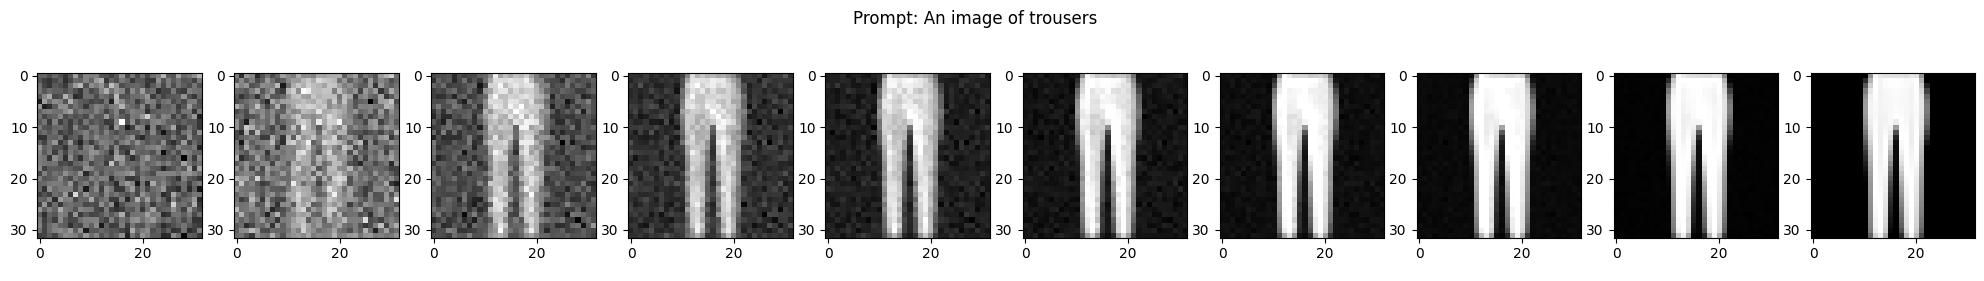

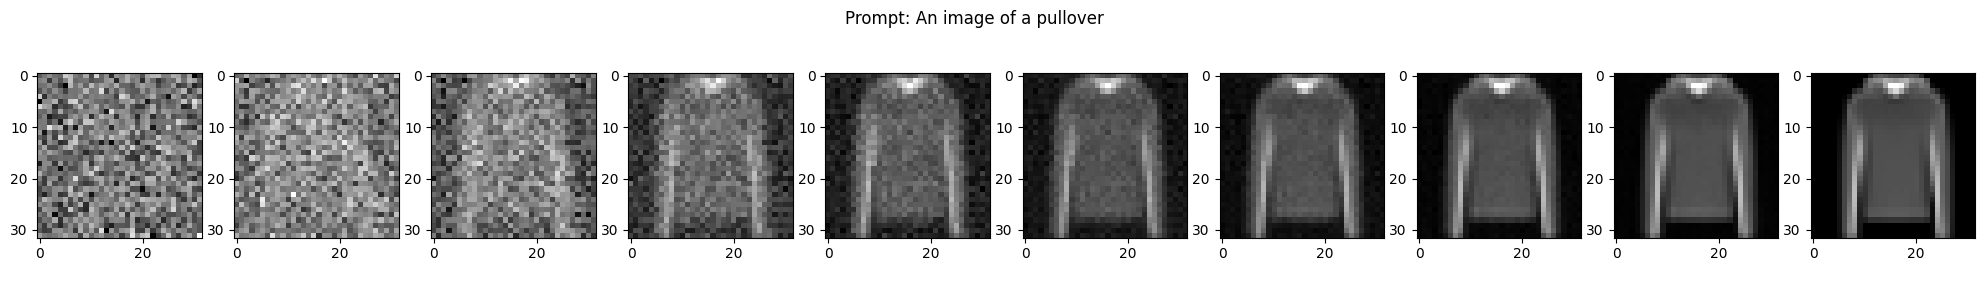

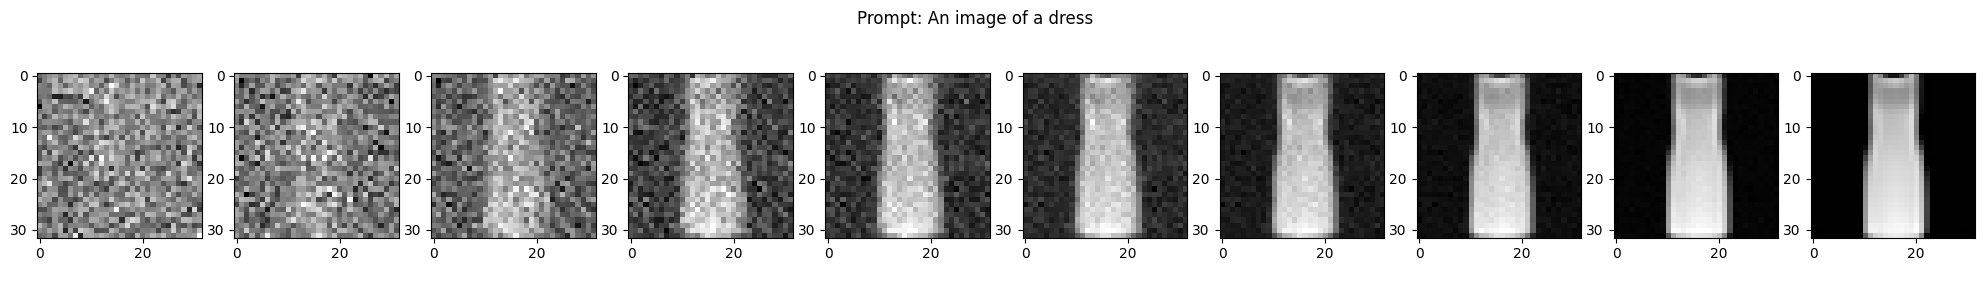

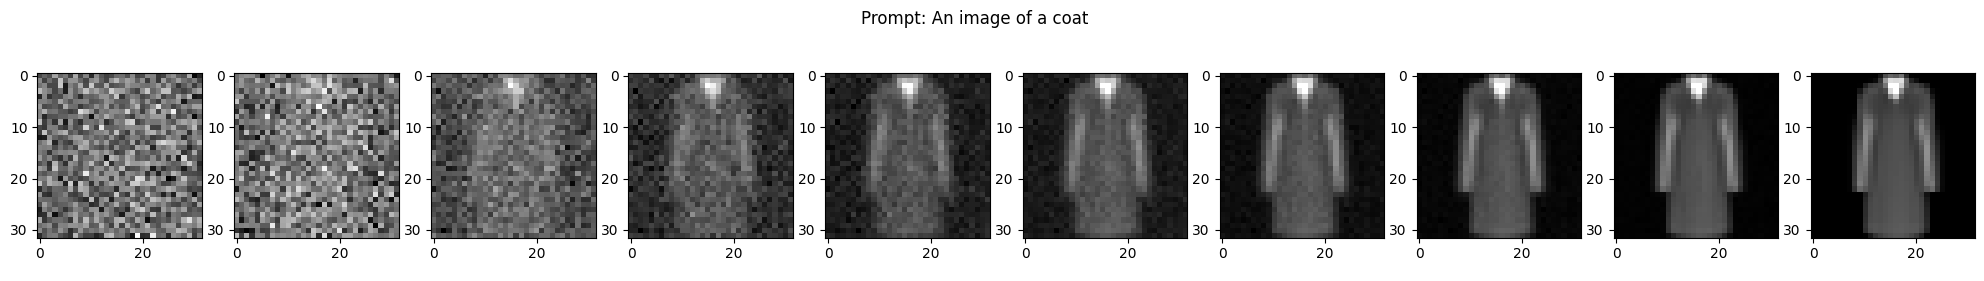

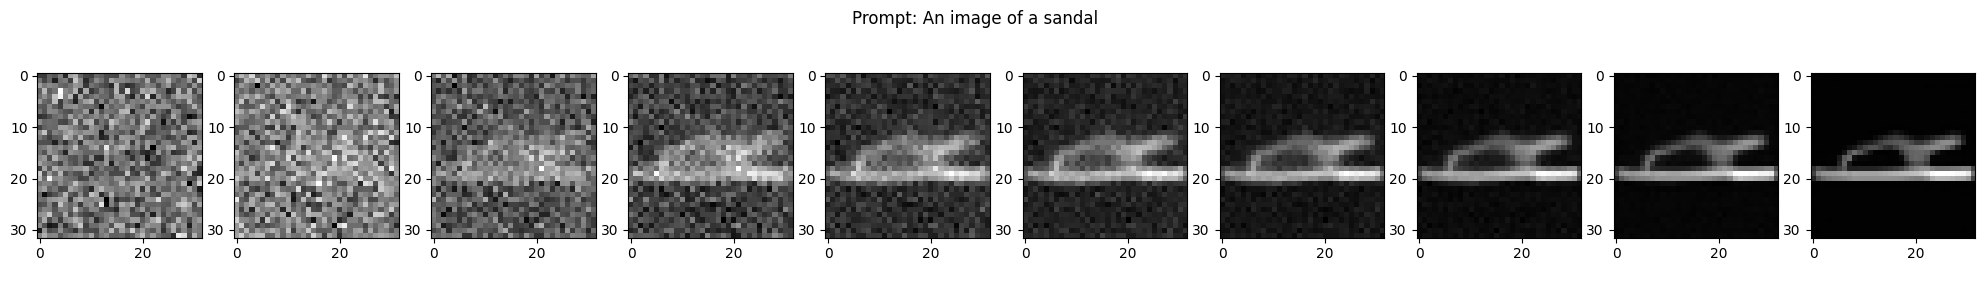

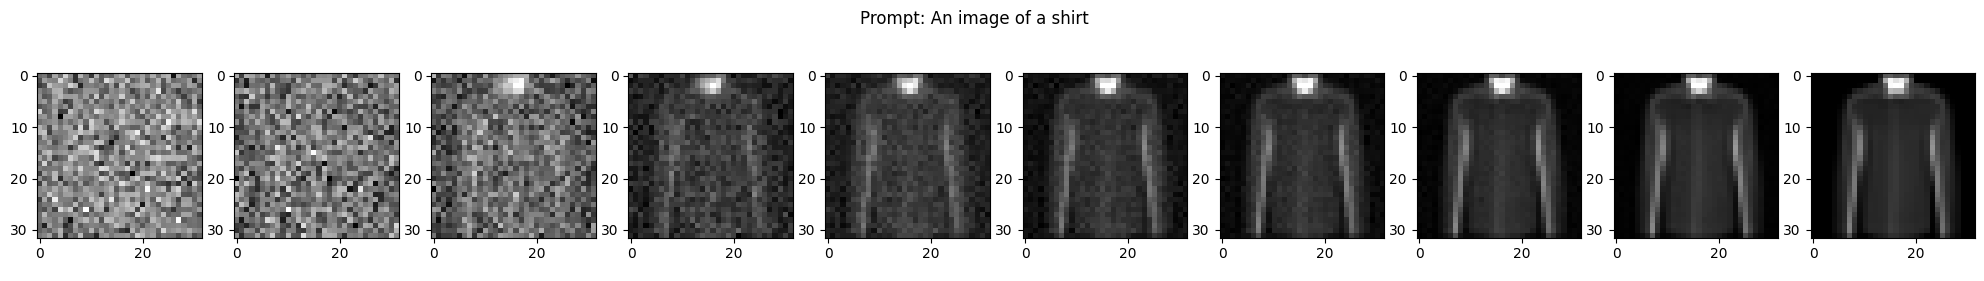

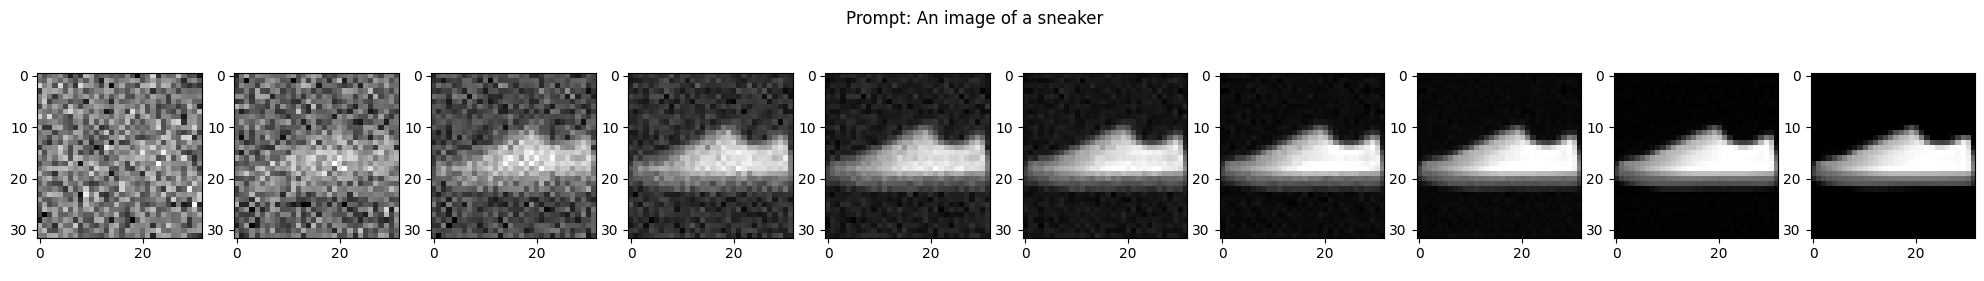

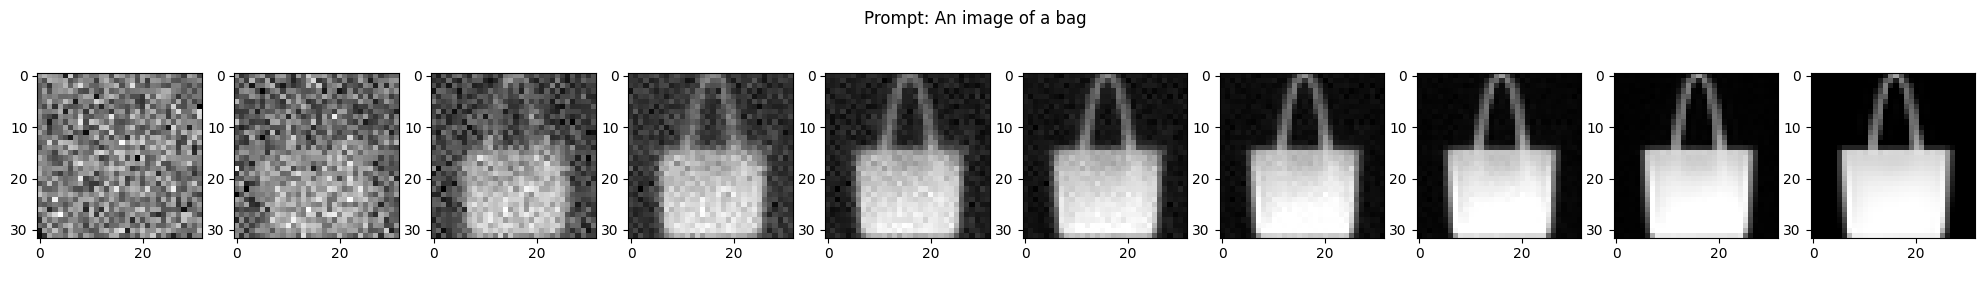

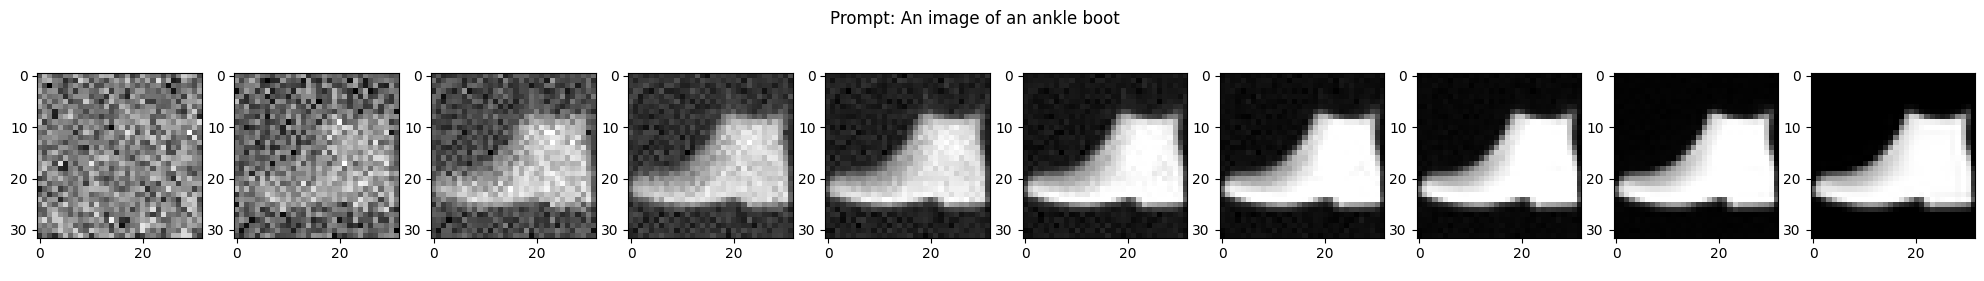

In [5]:
config = FMNISTConfig()
config.clip.model_location = "../" + config.clip.model_location 
config.prior.model_location = "../" + config.prior.model_location 
config.decoder.model_location = "../" + config.decoder.model_location 

captions = {
    0: "An image of a t-shirt/top",
    1: "An image of trousers",
    2: "An image of a pullover",
    3: "An image of a dress",
    4: "An image of a coat",
    5: "An image of a sandal",
    6: "An image of a shirt",
    7: "An image of a sneaker",
    8: "An image of a bag",
    9: "An image of an ankle boot"
}

sample_captions = torch.stack([tokenizer(x, text_seq_length=config.text_seq_length)[0] for x in captions.values()]).to(config.device)
sample_masks = torch.stack([tokenizer(x, text_seq_length=config.text_seq_length)[1] for x in captions.values()]).to(config.device)

for i in range(len(sample_captions)):
    caption = sample_captions[None, (i % len(sample_captions))]
    mask = sample_masks[None, (i % len(sample_masks))]
    test = sample_plot_image(config, caption, mask)